In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

In [2]:
play_store_df = pd.read_csv("googleplaystore.csv")
user_ratings_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
play_store_df_copy=play_store_df
user_ratings_df_copy=user_ratings_df

In [4]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
user_ratings_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
len(user_ratings_df)

64295

In [7]:
print play_store_df.shape
print user_ratings_df.shape

(10841, 13)
(64295, 5)


In [8]:
play_store_df.drop_duplicates(subset='App', inplace=True)
print play_store_df.shape

(9660, 13)


In [9]:
## Let's get the ratio of missing values for each feature
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio
Rating,15.144928
Current Ver,0.082816
Android Ver,0.031056
Content Rating,0.010352
Type,0.010352


In [10]:
play_store_df.dropna(subset =['Rating'], inplace = True)
print play_store_df.shape

(8197, 13)


In [11]:
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio
Current Ver,0.048798
Android Ver,0.036599
Content Rating,0.012200


In [12]:
play_store_df["Current Ver"].value_counts().head()

Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
Name: Current Ver, dtype: int64

In [13]:
## Fill the three columns with the mode value
play_store_df['Current Ver'] = play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0])
play_store_df['Android Ver'] = play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0])
play_store_df['Content Rating'] = play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0])

In [14]:
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio


In [15]:
play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)

In [16]:
## Basic Data Cleaning
#Remove '+' and ',' from 'Number of Installs' to make it numeric
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: int(x))

In [17]:
play_store_df["Size"].value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

In [18]:
## Size column - convert Mbs to kbs
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [19]:
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: float(x))

play_store_df['Price'] = play_store_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: float(x))

play_store_df['Reviews'] = play_store_df['Reviews'].apply(lambda x: int(x))

In [20]:
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
merged_df=play_store_df.merge(user_ratings_df,how="inner",on="App")
sentiment_df=merged_df.groupby(['App','Sentiment'])['Reviews'].count().reset_index()
pivoted = pd.pivot_table(sentiment_df,
                         index='App',
                         columns='Sentiment',
                         values='Reviews',
                         aggfunc=sum)
pivoted_sentiment=pivoted.reset_index()[['App','Positive']]

In [22]:
len(merged_df['App'].unique())

1020

In [23]:
len(play_store_df)

8196

<H5> Logistic Regression

In [24]:
from sklearn.metrics import confusion_matrix

In [43]:
def bucketInstalls(x):
    if x<=10000:
        return 'Low'
    elif (x>10000 and x<=1000000):
        return 'Medium'
    elif (x>1000000):
        return 'High'

In [44]:
logistic_df=play_store_df[['Installs','Reviews','Category','Content Rating','Type','Genres','Size']]
logistic_df=pd.get_dummies(logistic_df)
logistic_df['Installs']=logistic_df['Installs'].map(bucketInstalls)

In [45]:
len(logistic_df)

8196

In [46]:
logistic_df

,Installs,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Low,159,19.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Medium,967,14.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,High,87510,8.700,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,High,215644,25.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Medium,967,2.800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Medium,167,5.600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Medium,178,19.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Medium,36815,29.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Medium,13791,33.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Low,121,3.100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
logistic_df = logistic_df.dropna(subset=['Size'])

In [48]:
X=logistic_df.drop('Installs',axis=1)
y=logistic_df['Installs'].values
y=y.astype('str')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)


('LogisticRegression_accuracy:', 0.6685633001422475)


<H1> Logistic Regression Confusion Matrix

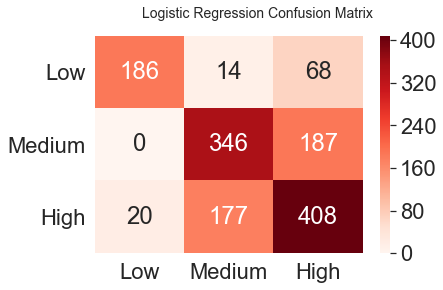

In [82]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Logistic Regression Confusion Matrix', fontsize=14)
sns.heatmap(lr_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Reds",fmt="d")

<H5> Predicting Installs using Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
random_df=logistic_df

In [55]:
random_df.columns

Index([u'Installs', u'Reviews', u'Size', u'Category_ART_AND_DESIGN',
       u'Category_AUTO_AND_VEHICLES', u'Category_BEAUTY',
       u'Category_BOOKS_AND_REFERENCE', u'Category_BUSINESS',
       u'Category_COMICS', u'Category_COMMUNICATION',
       ...
       u'Genres_Tools', u'Genres_Tools;Education', u'Genres_Travel & Local',
       u'Genres_Travel & Local;Action & Adventure', u'Genres_Trivia',
       u'Genres_Video Players & Editors',
       u'Genres_Video Players & Editors;Creativity',
       u'Genres_Video Players & Editors;Music & Video', u'Genres_Weather',
       u'Genres_Word'],
      dtype='object', length=158)

In [94]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [95]:
rdf_ac

0.8648648648648649

<H1> Random Forest without the tuning Confusion Matrix

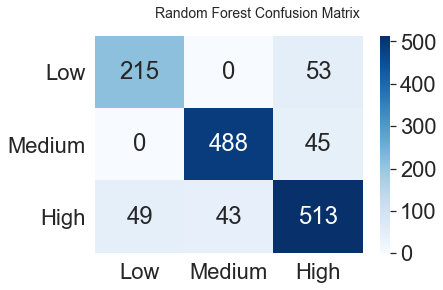

In [96]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Blues",fmt="d")

In [59]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [61]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [62]:
rdf_c=RandomForestClassifier(n_estimators=1200,criterion='entropy',random_state=0,max_depth=20, min_samples_leaf= 2,min_samples_split=5,max_features='sqrt')
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [63]:
rdf_ac

0.8805120910384068

<H1> Random Forest confusion matrix after parameter tuning

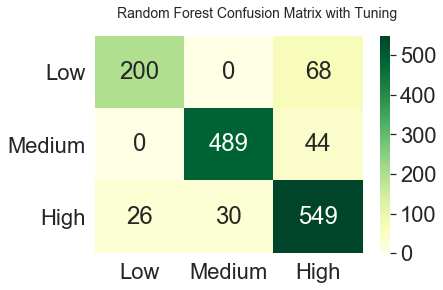

In [91]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix with Tuning', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlGn",fmt="d")

In [65]:
X.loc[:1:].columns

Index([u'Reviews', u'Size', u'Category_ART_AND_DESIGN',
       u'Category_AUTO_AND_VEHICLES', u'Category_BEAUTY',
       u'Category_BOOKS_AND_REFERENCE', u'Category_BUSINESS',
       u'Category_COMICS', u'Category_COMMUNICATION', u'Category_DATING',
       ...
       u'Genres_Tools', u'Genres_Tools;Education', u'Genres_Travel & Local',
       u'Genres_Travel & Local;Action & Adventure', u'Genres_Trivia',
       u'Genres_Video Players & Editors',
       u'Genres_Video Players & Editors;Creativity',
       u'Genres_Video Players & Editors;Music & Video', u'Genres_Weather',
       u'Genres_Word'],
      dtype='object', length=157)

In [66]:
import pandas as pd
feature_importances = pd.DataFrame(rdf_c.feature_importances_,
                                   index = X.loc[:1:].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [67]:
feature_importances.reset_index(inplace=True)

In [68]:
feature_importances.columns=['Features','Importance']

In [70]:
feature_importances.to_csv("Feature_Imp.csv",header=True)

<H5> Predicting Ratings using Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
accuracy_score(dtree_pred,y_test)


0.8570412517780939

<H1> Decision Tree Confusion Matrix

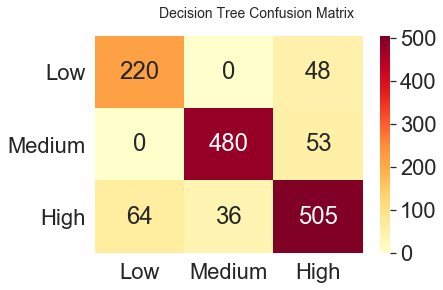

In [93]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Decision Tree Confusion Matrix', fontsize=14)
sns.heatmap(dtree_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlOrRd",fmt="d")

<H5> Predicting Ratings using Logistic Regression

In [ ]:
logistic_data=play_store_df[['Rating','Reviews','Category','Content Rating','Type','Genres']]

In [ ]:
logistic_data=pd.get_dummies(logistic_data)

In [ ]:
X=logistic_data.drop('Rating',axis=1)
y=logistic_data['Rating'].values
y=y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
#lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

In [ ]:
play_store_df_model=pd.get_dummies(play_store_df_model)#,columns=columns)
play_store_df_model.head(10)